## Wine Quality Prediction Using Random Forest Classifier

### The white wine dataset is used to train, test and build the machine learning model (random forest classifier). The red wine dataset then is used as the new (unseen) data for the model to predict the wine quality.
### The datasets are downloaded from https://online.stat.psu.edu/stat508/lesson/analysis-wine-quality-data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# load data from local
df = pd.read_csv(r'/Users/meow/Downloads/white_wine.csv')
# read a few lines of the data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
1,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
2,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
3,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
4,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [3]:
# show (rows, columns) of the table
df.shape

(3961, 12)

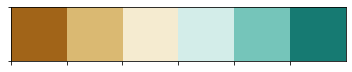

In [4]:
# preview the color palette

import matplotlib.pyplot as plt
import seaborn as sns

sns.palplot(sns.color_palette('BrBG'))
plt.show()

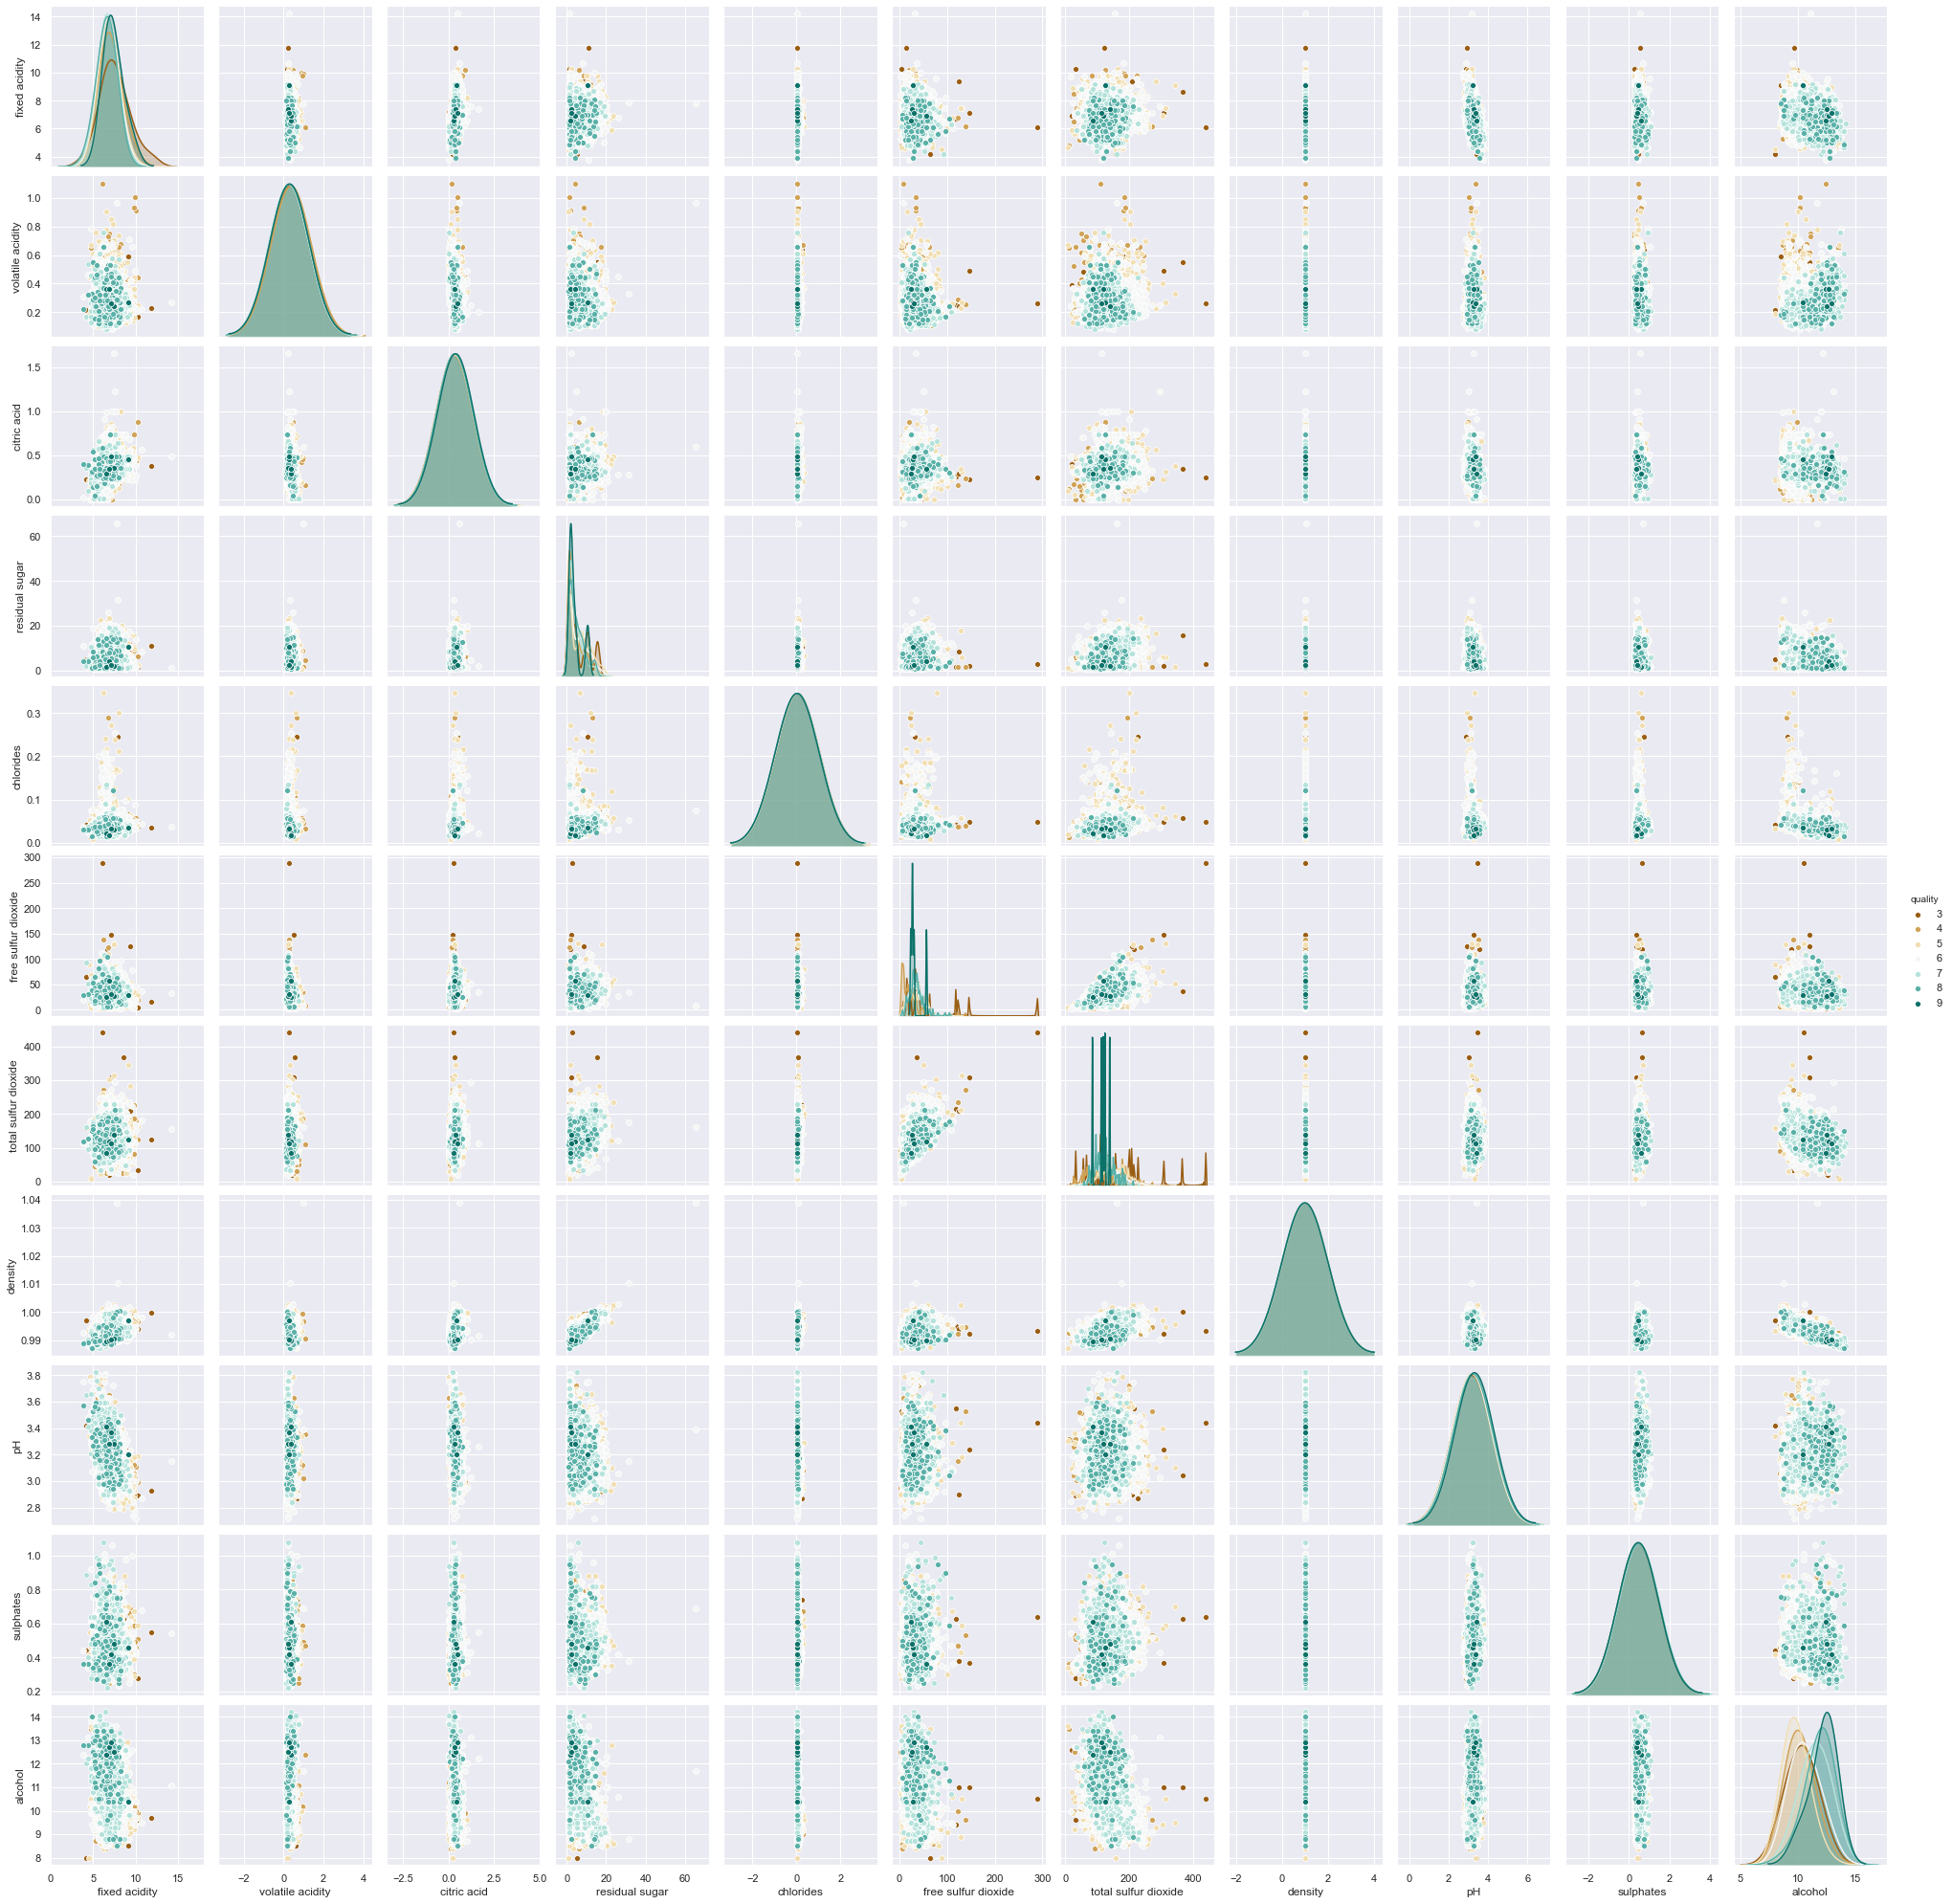

In [5]:
# visualize the data using seaborn Pairplots
import seaborn as sns
sns.set(rc = {'figure.figsize':(20, 20)})

g = sns.pairplot(df, hue = 'quality', diag_kws = {'bw': 1}, palette = 'BrBG')

### The dataset does not look the best for machine learning...?

In [6]:
# splitting the dataset into training and testing

from sklearn.model_selection import train_test_split
X = df.drop('quality', axis = 1).values # Input features (attributes)
y = df['quality'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 0)

X shape: (3961, 11)
y shape: (3961,)


In [7]:
# random forest

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X = X_test)

In [8]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  1.0
Testing Accuracy is:  0.5768261964735516


### The accuracy is not great..

## Confusion Matrix --
## A useful technique for visualising the model performance in detail. 
## The diagonal values are true positive counts, whereas off-diagonal values are false positive and false negative counts for each class against the other.

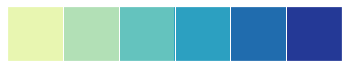

In [9]:
sns.palplot(sns.color_palette('YlGnBu'))
plt.show()

In [10]:
# confusion matrix function

from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes = None, title = 'Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels = classes, yticklabels = classes, vmin = 0., vmax = 1., annot = True, annot_kws = {'size':12}, cmap = 'YlGnBu')
    else:
        sns.heatmap(cm, vmin = 0., vmax = 1., palette = 'YlGnBu')
    plt.title(title)
    plt.ylabel('True Quality Score')
    plt.xlabel('Predicted Quality Score')

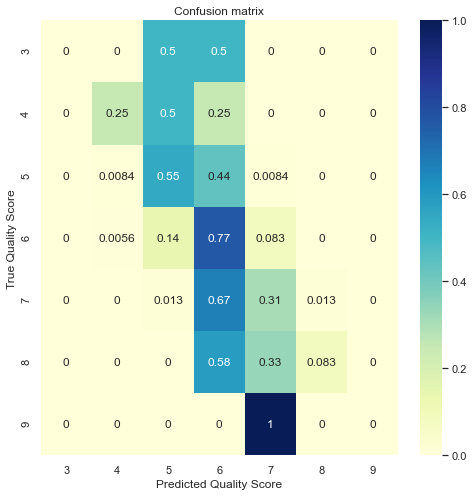

In [11]:
# plotting confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis = 1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes = rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.584
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.453
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.479
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.514
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.516
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.577
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.511
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.514
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.531
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.557
Classification accuracy on test set with max features = log2 and max_depth = None: 0.577
Classification accuracy on test set with max features = log2

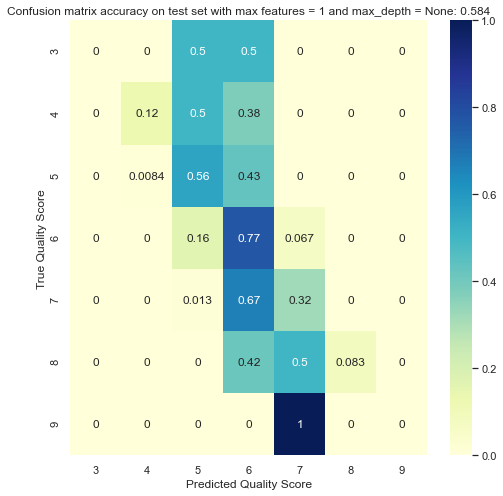

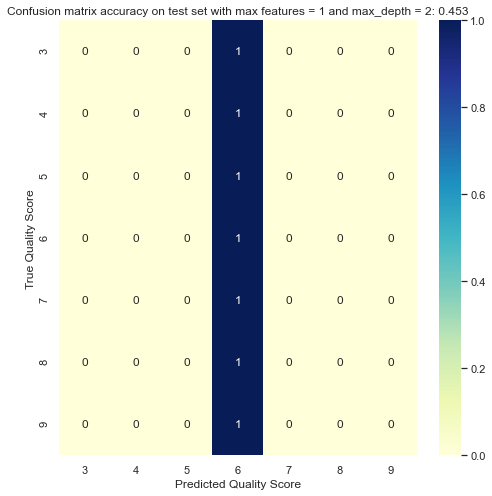

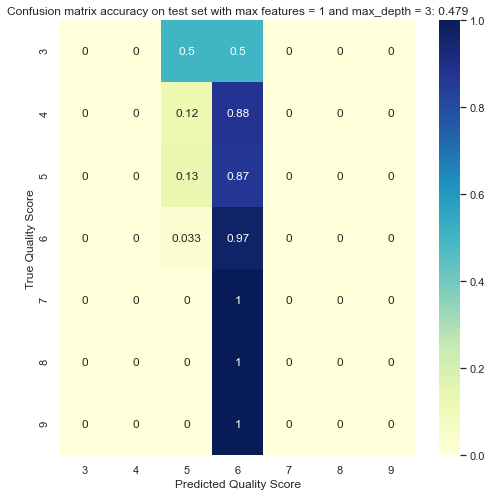

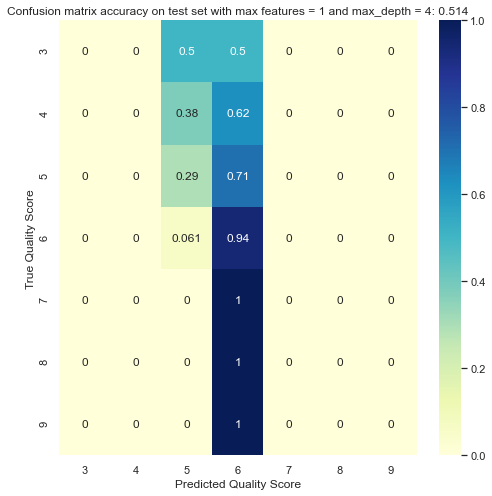

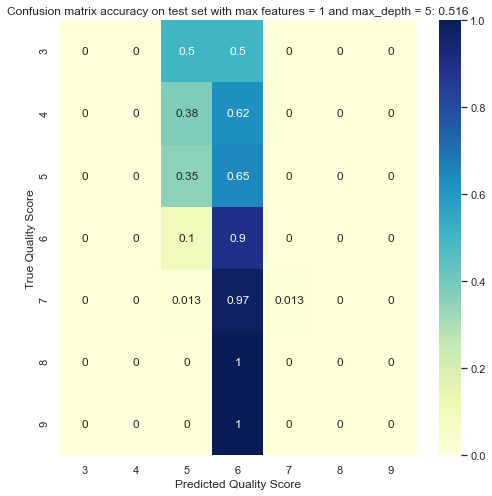

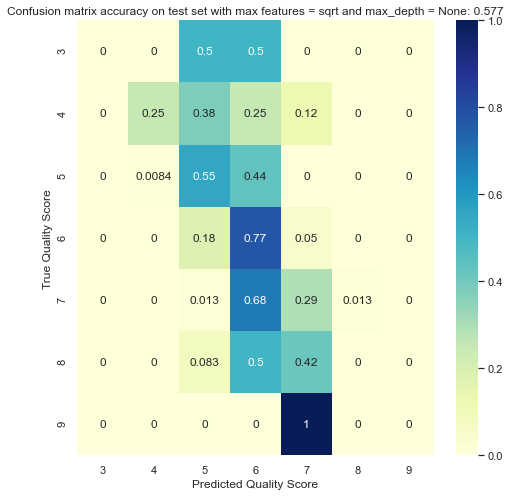

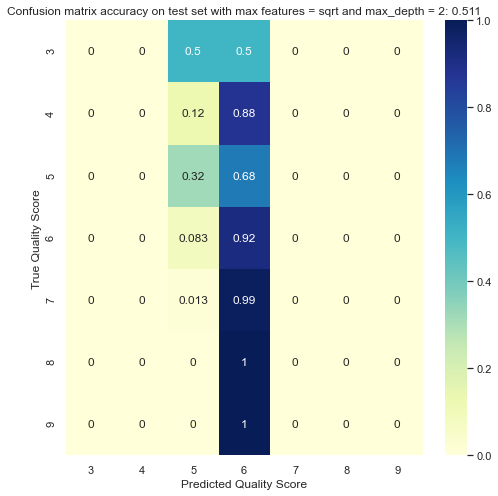

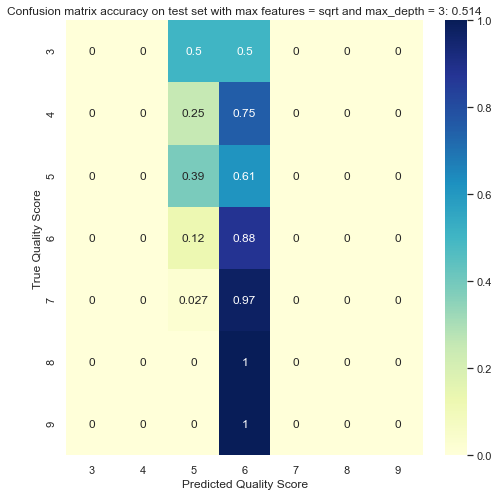

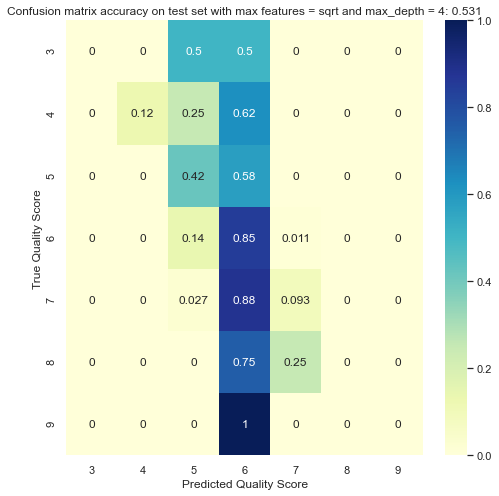

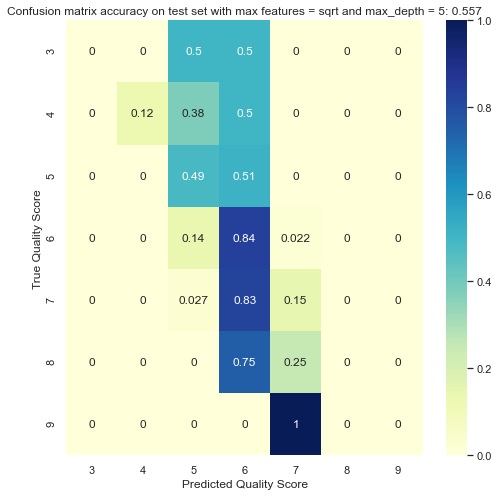

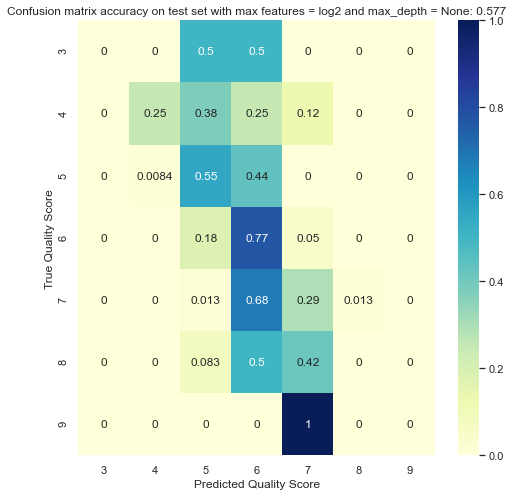

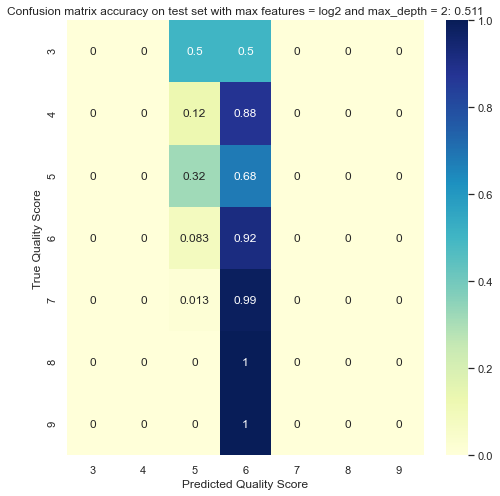

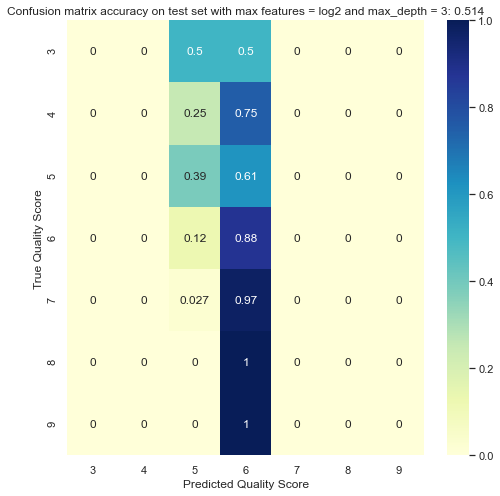

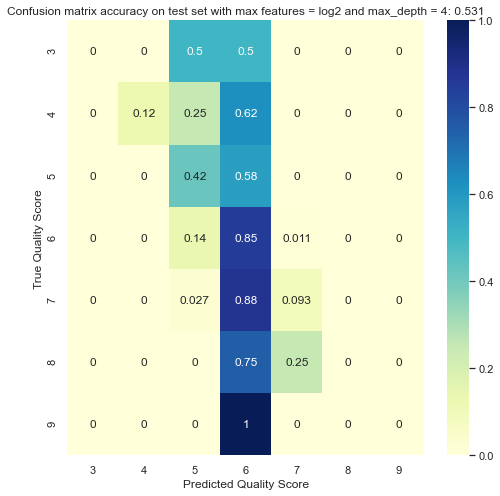

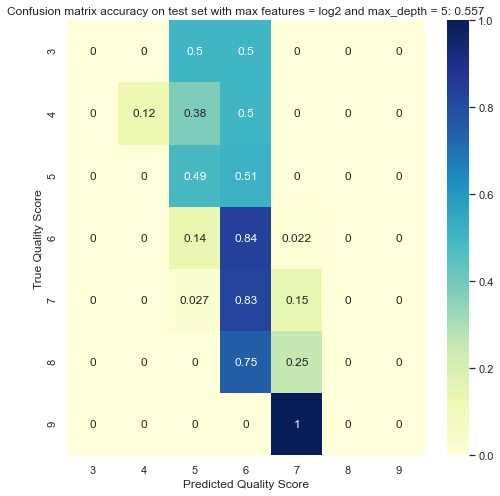

In [12]:
# fine tunning random forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=3333)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

## Now it's time to deploy the model on new (unseen) data - the red wine dataset

In [13]:
# loading new data
df_new = pd.read_csv(r'/Users/meow/Downloads/red_wine.csv')
# read a few lines of the data
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8


In [14]:
# show (rows, columns) of the table
df_new.shape

(1359, 12)

In [15]:
# drop the quality column becasue we need to predict it
df_new = df_new.drop('quality', axis = 1)

In [16]:
df_new.shape

(1359, 11)

In [17]:
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4


In [18]:
# making predictions

pred_red_wine = rf.predict(df_new.values)

pred_red_wine

array([6, 6, 6, ..., 5, 5, 5])

In [19]:
# joining the predictions with the red wine dataset

output = df_new.copy()
output['Predictions - quality'] = pred_red_wine

output.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Predictions - quality
0,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,6
1,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,6
2,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,6
3,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,5
4,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,6


In [20]:
# exporting the data in to a .csv file

import os
output.to_csv('red_wine_pred.csv', sep = '\t')

os.getcwd() 

'/Users/meow'